# Sea-level change from altimetry and tide gauges

This notebook was developed based on the tools available here: https://github.com/sea-level-change/notebooks.

First, let's clone that repository to get access to their code. Open a terminal and run the following commands (one at a time):
```
chmod 400 ~/.ssh/id_rsa
git clone git@github.com:sea-level-change/notebooks.git ~/sea-level-change/notebooks
```

Next, create a conda environment so that we can use their tools. This can take a few minutes to run but after you do this once, you won't have to do it again the next time that you login. Open a terminal and run the following command:
```
mamba env create -f /home/jovyan/sea-level-change/notebooks/environment.yml
```

Once that finishes, come back to this notebook, click on "Python 3 (ipykernel)" in the upper-right hand corner, select `slcp_notebook` from the dropdown menu, and click "Select". Now, continue to the rest of the code cells.

In [1]:
import sys
sys.path.append('/home/jovyan/sea-level-change/notebooks')
import slcp_modules.plotting as plotting
import slcp_modules.processing as processing
import slcp_modules.algorithms as algorithms

import requests
import pandas as pd

## Find all tide gauge data that's available through the NASA Sea-Level Change Portal API

In [2]:
sea_base_url = 'https://sealevel-dataservices.jpl.nasa.gov/edge/ws/search/tidegauge'
r = requests.get(sea_base_url)

props = [f['properties'] for f in r.json()['features']]
sea_df = pd.DataFrame(props)
sea_df

,type,name,psmsl_id,url,coastline_code,station_code,country,time_span_of_data,completeness,date_of_last_update,...,vlm_unc,sterodynamic_trend,sterodynamic_unc,sal,sal_unc,sum,sum_unc,residual,residual_unc,reconstructed_trend
0,tide_gauge,ONISAKI,1026,https://www.psmsl.org/data/obtaining/stations/...,642,128,Japan,1963 – 2020,99.0,03 Mar 2021,...,0.316,1.926020,0.490263,2.080762,0.190608,-1.214210,0.591425,-0.401853,0.801249,4.006782
1,tide_gauge,OSHORO II,1027,https://www.psmsl.org/data/obtaining/stations/...,641,42,Japan,1963 – 2020,100.0,03 Mar 2021,...,0.528,0.442146,0.327245,2.129816,0.192336,-0.844347,0.681802,1.776880,0.678169,2.571962
2,tide_gauge,SAN FRANCISCO,10,https://www.psmsl.org/data/obtaining/stations/...,823,31,United States,1854 – 2020,100.0,02 Feb 2021,...,0.351,0.134363,0.848439,1.812051,0.173124,1.887840,0.959126,-0.605314,0.641942,1.946415
3,tide_gauge,BREST,1,https://www.psmsl.org/data/obtaining/stations/...,190,91,France,1807 – 2020,90.0,06 May 2021,...,0.227,0.141824,0.300264,1.565905,0.176479,2.120420,0.630292,-0.250422,0.510638,1.707729
4,tide_gauge,SAN JUAN,1001,https://www.psmsl.org/data/obtaining/stations/...,938,21,Puerto Rico,1962 – 2020,91.0,02 Feb 2021,...,0.430,1.140430,0.741311,1.929388,0.183732,2.873010,0.858942,0.601412,0.625794,3.069818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583,tide_gauge,CADIZ III,985,https://www.psmsl.org/data/obtaining/stations/...,220,3,Spain,1961 – 2018,97.0,14 Mar 2019,...,0.275,0.968632,0.310201,1.727576,0.182703,2.101170,0.568874,-0.903691,1.100365,2.696208
584,tide_gauge,ULSAN,997,https://www.psmsl.org/data/obtaining/stations/...,620,51,"Korea, Republic Of",1962 – 2019,97.0,02 Sep 2020,...,0.513,1.741960,0.292763,2.026926,0.183676,4.182950,0.632741,-0.315196,1.035549,3.768886
585,tide_gauge,BELLA BELLA,984,https://www.psmsl.org/data/obtaining/stations/...,822,16,Canada,1961 – 2020,96.0,14 Sep 2021,...,0.403,0.282002,0.742612,1.526826,0.161887,0.387669,1.048467,0.096194,0.595535,1.808828
586,tide_gauge,PORT TARANAKI,996,https://www.psmsl.org/data/obtaining/stations/...,690,81,New Zealand,1955 – 2020,81.0,19 Aug 2021,...,0.280,3.003020,0.794695,1.437533,0.159404,5.534820,0.852745,-2.710020,0.940832,4.440553


### Search the DataFrame for the tide gauge corresponding to Sewells Point, Hampton Roads in northeastern Virginia, USA

In [3]:
# Find the id for the tide gauge at Sewells Point, Hampton Roads
matches = processing.search_inventory(sea_df, 'name', 'sewells point')

name = matches[0]
ne_va_df = sea_df[sea_df['name'] == name]
ne_va_id = ne_va_df['psmsl_id']
ne_va_df


,type,name,psmsl_id,url,coastline_code,station_code,country,time_span_of_data,completeness,date_of_last_update,...,vlm_unc,sterodynamic_trend,sterodynamic_unc,sal,sal_unc,sum,sum_unc,residual,residual_unc,reconstructed_trend
387,tide_gauge,"SEWELLS POINT, HAMPTON ROADS",299,https://www.psmsl.org/data/obtaining/stations/...,960,71,United States,1927 – 2020,99.0,02 Feb 2021,...,0.384,2.73433,1.3783,1.762996,0.170016,6.81394,1.53554,-1.49507,1.381101,4.497326


### Get the data for Sewells Point, Hampton Roads in Northeastern Virginia
___
We use the psmsl id for Sewells Point, Hampton Roads to obtain the data for that tide gauge

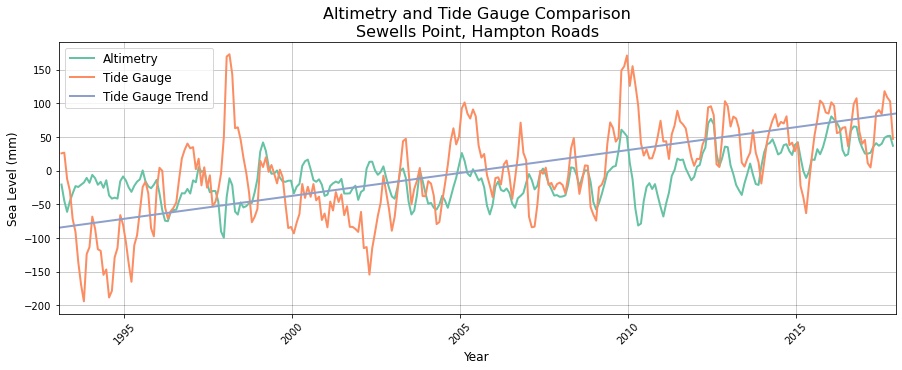

In [4]:
# Get the data from SEA
params = {
    'psmsl_id': ne_va_id
}
r = requests.get(f'{sea_base_url}', params=params).json()

sea_results = processing.prep_sea(r)
plotting.sea_plot(sea_results, rolling=True)


In [43]:
import requests
import numpy as np

psmsl_url = 'https://psmsl.org/data/obtaining/rlr.monthly.data/299.rlrdata'
#psmsl_url = ne_va_df['url']

r = requests.get(f'{psmsl_url}').content.decode('utf8')

year = list()
sea_level = list()
for line in r.split('\n'):
    if len(line) > 0:
        year.append(float(line.split(';')[0].strip()))
        sea_level.append(float(line.split(';')[1].strip()))

year = np.array(year)
sea_level = np.array(sea_level)

year = year[sea_level!=-99999]
sea_level = sea_level[sea_level!=-99999]


(2000.0, 2020.0)

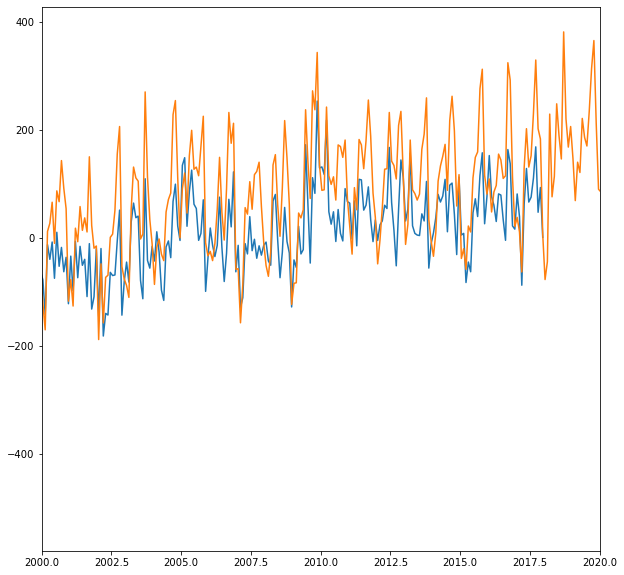

In [49]:
import matplotlib.pyplot as plt

ref_idx = np.argmin(np.abs(year - 2005.))

fig = plt.figure(figsize=(10,10))
plt.plot(sea_results['Tide Gauge'].time[:], sea_results['Tide Gauge'][:])
plt.plot(year, sea_level - sea_level[ref_idx])

plt.xlim(2000,2020)

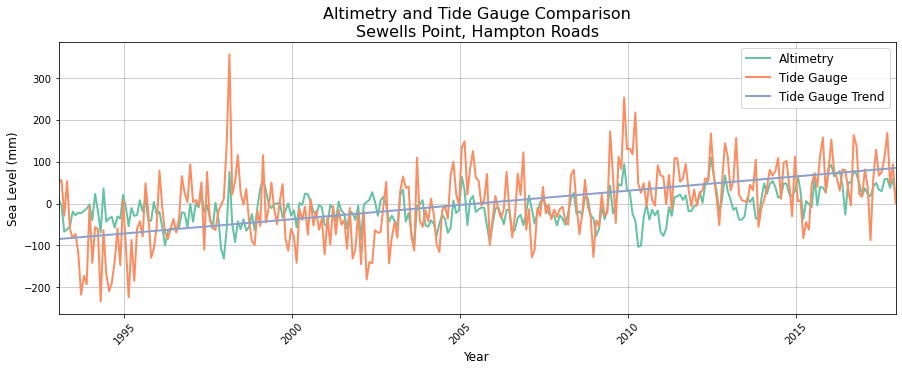

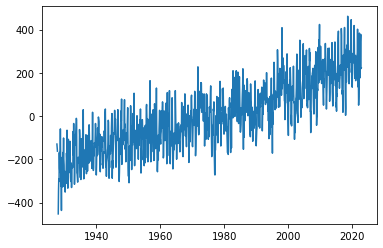

In [44]:
import matplotlib.pyplot as plt

plotting.sea_plot(sea_results)
plt.plot(year, sea_level - np.nanmean(sea_level))